### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

           WATER PROTEIN  FAT LACTOSE  ASH
HORSE       90.1     2.6  1.0     6.9 0.35
ORANGUTAN   88.5     1.4  3.5     6.0 0.24
MONKEY      88.4     2.2  2.7     6.4 0.18
DONKEY      90.3     1.7  1.4     6.2 0.40
HIPPO       90.4     0.6  4.5     4.4 0.10
CAMEL       87.7     3.5  3.4     4.8 0.71
BISON       86.9     4.8  1.7     5.7 0.90
BUFFALO     82.1     5.9  7.9     4.7 0.78
GUINEA_PIG  81.9     7.4  7.2     2.7 0.85
CAT         81.6    10.1  6.3     4.4 0.75
FOX         81.6     6.6  5.9     4.9 0.93
LLAMA       86.5     3.9  3.2     5.6 0.80
MULE        90.0     2.0  1.8     5.5 0.47
PIG         82.8     7.1  5.1     3.7 1.10
ZEBRA       86.2     3.0  4.8     5.3 0.70
SHEEP       82.0     5.6  6.4     4.7 0.91
DOG         76.3     9.3  9.5     3.0 1.20
ELEPHANT    70.7     3.6 17.6     5.6 0.63
RABBIT      71.3    12.3 13.1     1.9 2.30
RAT         72.5     9.2 12.6     3.3 1.40
DEER        65.9    10.4 19.7     2.6 1.40
REINDEER    64.8    10.7 20.3     2.5 1.40
WHALE      

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

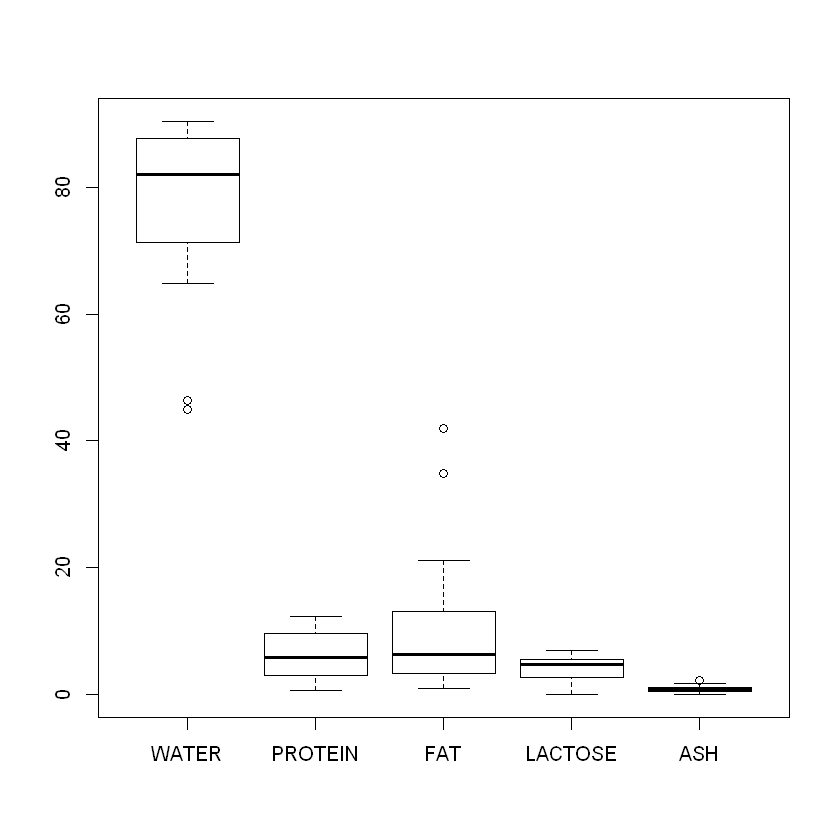

In [1]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("c:\\milk.dat",row.names=1,dec=".",header=TRUE)
print(datos)
summary(datos)
boxplot(datos)

**Descripción de los datos y porque realizar un análisis de agrupamiento**

Se trata de un conjunto de datos que describen la composición de la leche de 25 mamíferos. Se consideran 5 características en porcentajes: agua, proteína, grasa, lactosa y calcio. Se puede observar del boxplot que, en promedio, el mayor porcentaje de todas las leches es agua (cerca de 80%), seguido de proteína, grasa y lactosa (cerca del 5%) y bastante menor porcentaje de calcio (0,8%). Las componente que tienen mayor variación son el porcentaje de agua y de grasa. Parece pertinente realizar un análisis de agrupamiento para distinguir grupos de mamíferos que poseen leches de características similares.

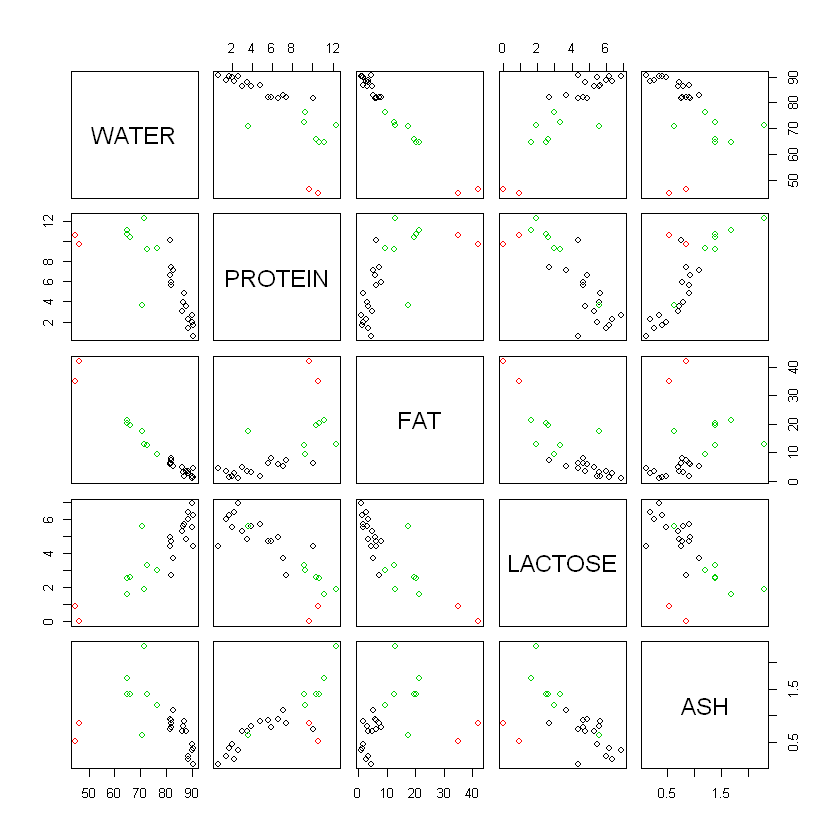

In [11]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Al considerar 3 grupos con el algoritmo KMeans, se obtienen grupos claramente diferenciados por las variables porcentaje de agua y grasa. El grupo negro (focas y delfines), con los menores porcentajes de agua y mayores porcentajes de grasa. El grupo negro, con 6 mamíferos, cuyas leches tienen porcentajes intermedios de agua (60 a 75%) y grasa (12 a 22%). Y luego el grupo rojo, el mas común, con 17 mamíferos, cuyas leches tienen mas de 75% de agua y menos de 10% de grasa. Las otras variables no permiten discriminar completamente los 3 grupos definidos.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1.332785e+00,0.22326342,-0.01492711,0.185200990,-0.019506445
2.060294e+00,-1.01919913,0.76243569,0.510091168,0.029381555
-1.309609e+00,0.77403221,-0.15970917,-0.015484555,-0.064370973
-2.212053e+00,0.34503580,-0.21147194,-0.064828833,0.044332315
-2.345616e+00,0.31000268,-0.20568573,-0.108604915,0.031051371
-2.555018e-01,0.28737324,0.88185687,0.013099885,-0.016484103
-3.528390e+00,-2.28086300,0.12858522,-0.432830339,-0.249417356
-4.133773e+00,-2.20080107,0.06721481,0.374615334,0.190501442
4.710687e-01,0.39033806,-0.10706204,-0.108384912,-0.029962683
2.255503e+00,-0.23269966,-0.10290220,0.009369287,0.005376567


K-means clustering with 20 clusters of sizes 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1

Cluster means:
      WATER PROTEIN   FAT LACTOSE       ASH
1  87.10000     3.7  3.30     5.2 0.7550000
2  90.40000     0.6  4.50     4.4 0.1000000
3  72.50000     9.2 12.60     3.3 1.4000000
4  65.90000    10.4 19.70     2.6 1.4000000
5  64.80000    10.7 20.30     2.5 1.4000000
6  81.90000     7.4  7.20     2.7 0.8500000
7  44.90000    10.6 34.90     0.9 0.5300000
8  46.40000     9.7 42.00     0.0 0.8500000
9  81.80000     6.1  6.15     4.8 0.9200000
10 90.13333     2.1  1.40     6.2 0.4066667
11 70.70000     3.6 17.60     5.6 0.6300000
12 86.20000     3.0  4.80     5.3 0.7000000
13 82.80000     7.1  5.10     3.7 1.1000000
14 64.80000    11.1 21.20     1.6 1.7000000
15 81.60000    10.1  6.30     4.4 0.7500000
16 82.10000     5.9  7.90     4.7 0.7800000
17 71.30000    12.3 13.10     1.9 2.3000000
18 88.45000     1.8  3.10     6.2 0.2100000
19 76.30000     9.3  9.50     3.0 1.2000000


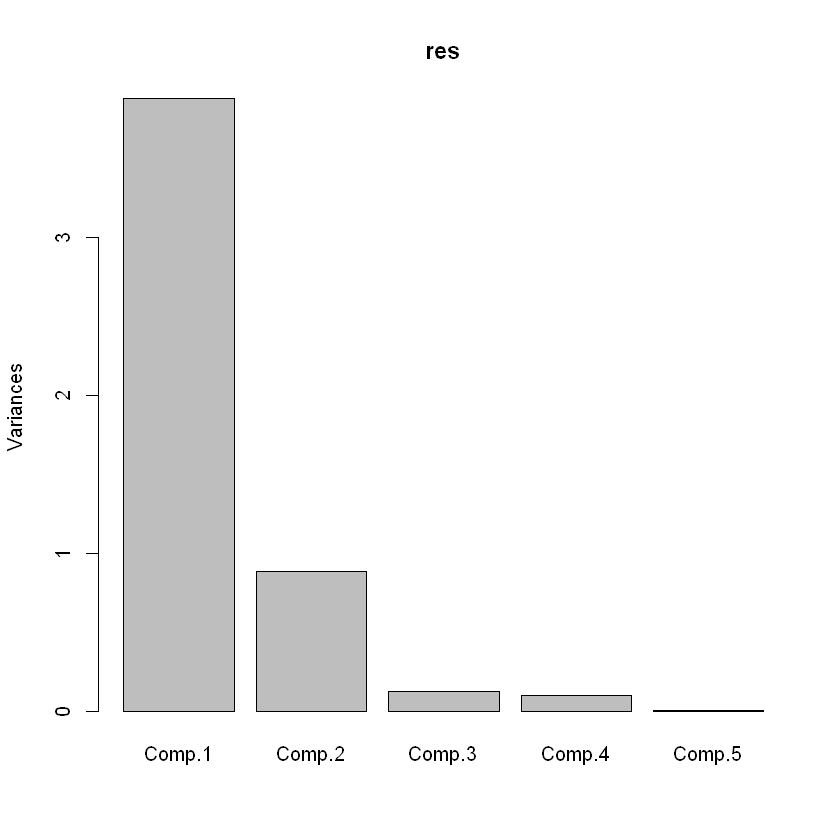

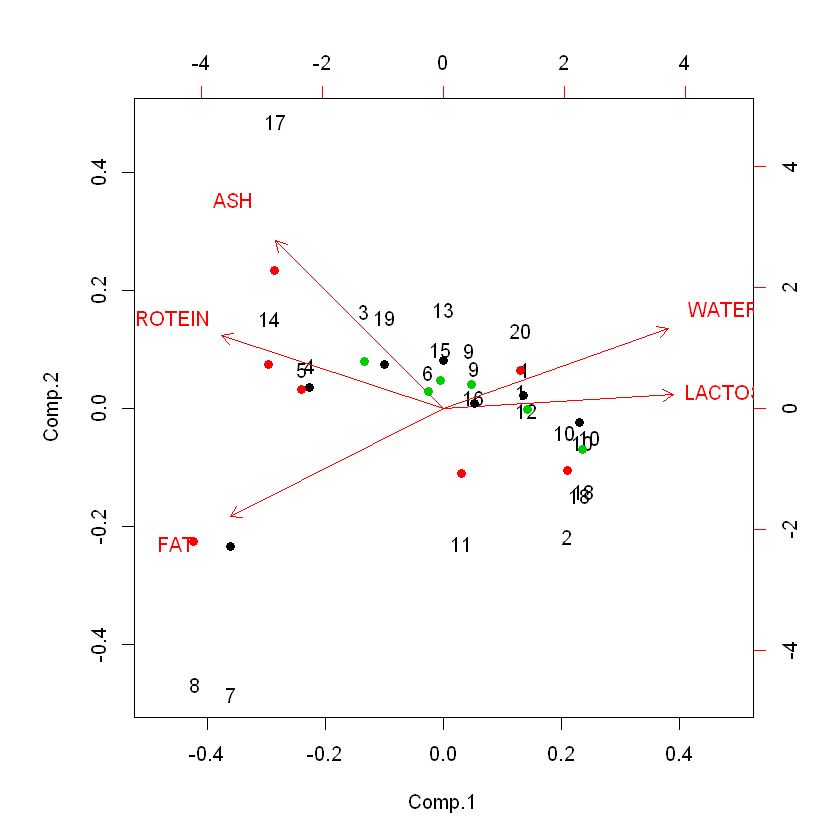

In [9]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 3 representa a los individuos con mayores valores de FAT, mientras corresponde a los mamíferos con mayores porcentajes de agua y lactosa y por otra parte el grupo 2 contiene mamíferos con mayores porcentajes de proteína y calcio (a excepción de un caso).

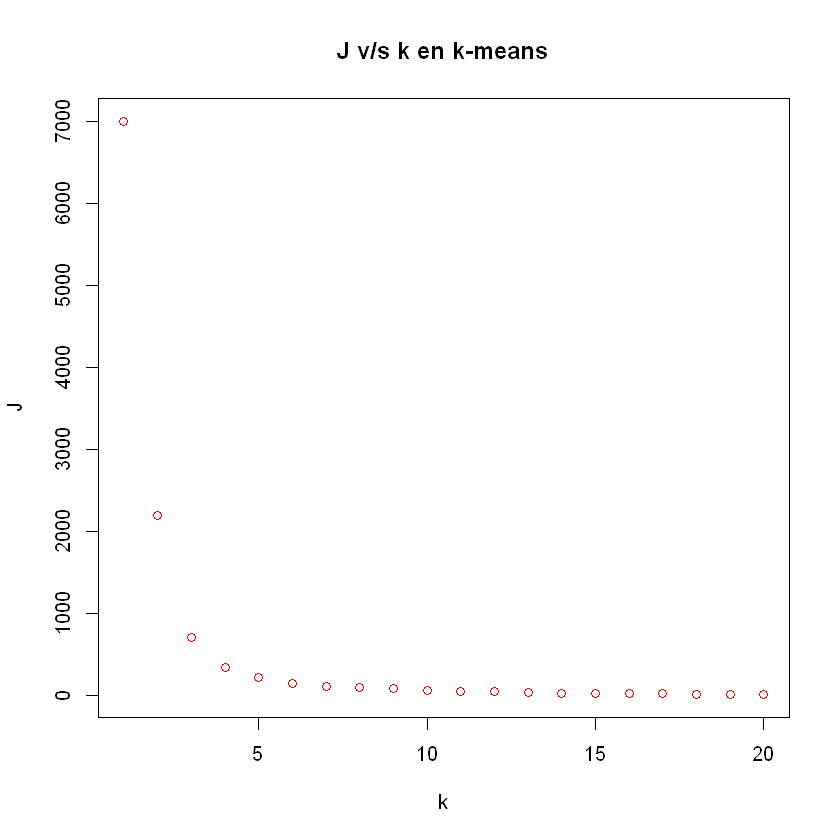

In [6]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

**Ejercicio 1:** 
1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Agregue código para automatizar este criterio.
2. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados

In [15]:
tapply(datos[,1],cl$cluster,summary)
tapply(datos[,2],cl$cluster,summary)
tapply(datos[,3],cl$cluster,summary)
tapply(datos[,4],cl$cluster,summary)
tapply(datos[,5],cl$cluster,summary)


$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  81.60   82.08   86.70   86.06   88.88   90.40 

$`2`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  44.90   45.27   45.65   45.65   46.02   46.40 

$`3`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  64.80   65.35   70.70   69.47   71.90   76.30 


$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.600   2.150   3.700   4.275   6.075  10.100 

$`2`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.700   9.925  10.150  10.150  10.375  10.600 

$`3`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.600   9.250  10.400   9.514  10.900  12.300 


$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.475   4.000   4.175   6.000   7.900 

$`2`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.90   36.67   38.45   38.45   40.23   42.00 

$`3`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.50   12.85   17.60   16.29   20.00   21.20 


$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.700   4.625   5.100   5.119   5.775   6.900 

$`2`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.225   0.450   0.450   0.675   0.900 

$`3`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.600   2.200   2.600   2.929   3.150   5.600 


$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1000  0.3875  0.7300  0.6356  0.8625  1.1000 

$`2`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.53    0.61    0.69    0.69    0.77    0.85 

$`3`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.630   1.300   1.400   1.433   1.550   2.300 


**Ejercicio 2:** Realice un análisis de clustering con el conjunto de datos comunas.csv. 
1. Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento
2. Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 
3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados


In [5]:
datos <- read.csv("comunas.csv",header=TRUE,sep=";",dec=".")